In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [2]:
def plot_feature_importances_cancer(X,model):
     n_features = X.shape[1]
     plt.barh(range(n_features), model.feature_importances_, align='center')
     plt.yticks(np.arange(n_features), X.columns)
     plt.xlabel("Feature importance")
     plt.ylabel("Feature")

In [3]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")  

In [4]:
#test_df dataset is not containing label i.e., Loan Status is empty.Hence can not be used for testing.
train,test = train_test_split(train_df,test_size = 0.3,random_state = 0,stratify = train_df["Loan Status"])

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47294 entries, 48901 to 51064
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            47294 non-null  int64  
 1   Loan Amount                   46513 non-null  float64
 2   Funded Amount                 47294 non-null  int64  
 3   Funded Amount Investor        47294 non-null  float64
 4   Term                          46678 non-null  float64
 5   Batch Enrolled                47294 non-null  object 
 6   Interest Rate                 47294 non-null  float64
 7   Grade                         47294 non-null  object 
 8   Sub Grade                     47294 non-null  object 
 9   Home Ownership                47294 non-null  object 
 10  Employment Duration           47294 non-null  float64
 11  Verification Status           47294 non-null  object 
 12  Payment Plan                  47294 non-null  object 
 1

In [6]:
mean_inputation = SimpleImputer(strategy = "mean")
mode_imputation = SimpleImputer(strategy = "most_frequent")

In [7]:
train["Loan Amount"] = mean_inputation.fit_transform(train[["Loan Amount"]])

test["Loan Amount"] = mean_inputation.transform(test[["Loan Amount"]])

In [8]:
train["Term"] = mode_imputation.fit_transform(train[["Term"]])
test["Term"] = mode_imputation.transform(test[["Term"]])

In [9]:
X_train = train.drop(columns = ["ID","Loan Status","Payment Plan","Accounts Delinquent","Batch Enrolled"])
y_train = train["Loan Status"].astype(int)

X_test = test.drop(columns = ["ID","Loan Status","Payment Plan","Accounts Delinquent","Batch Enrolled"])
y_test = test["Loan Status"].astype(int)

In [10]:
categorical_col = [col for col in X_train.columns if X_train[col].dtypes == 'object']
numerical_col = list(set(X_train.columns) - set(categorical_col))

In [11]:
enc = OrdinalEncoder()
scaler = StandardScaler()

In [12]:
train_categorical_col = enc.fit_transform(X_train[categorical_col])

train_numerical_col = scaler.fit_transform(X_train[numerical_col])

X_train_transformed = pd.DataFrame(np.hstack((train_categorical_col,train_numerical_col)),
                columns = X_train.columns)

In [13]:
test_categorical_col = enc.transform(X_test[categorical_col])

test_numerical_col = scaler.transform(X_test[numerical_col])

X_test_transformed = pd.DataFrame(np.hstack((test_categorical_col,test_numerical_col)),
                columns = X_test.columns)

In [14]:
tree = DecisionTreeClassifier(random_state = 0)

In [15]:
tree.fit(X_train_transformed,y_train)

DecisionTreeClassifier(random_state=0)

In [16]:
print("Accuracy on training set: {:.3f}".format(tree.score(X_train_transformed, y_train)))

print("Accuracy on test set: {:.3f}".format(tree.score(X_test_transformed, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.817


In [17]:
y_pred = tree.predict(X_test_transformed)
print("f1 score on test set: {:.3f}".format(f1_score(y_test,y_pred)))

f1 score on test set: 0.109


In [18]:
from sklearn.ensemble import RandomForestClassifier

In [19]:
rcf = RandomForestClassifier()
rcf.fit(X_train_transformed,y_train)
print("Accuracy on training set: {:.3f}".format(rcf.score(X_train_transformed, y_train)))
print("Accuracy on test set: {:.3f}".format(rcf.score(X_test_transformed, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.908


#### Lets decrease model complexity.This is can be done by the hyperparamter.
1. max_depth controls the depth of the tree.Shallow tree do not overfit the data.
2. Similiarly,min_samples_split and min_samples_leaf helps in avoiding overfiiting

In [20]:
rcf = RandomForestClassifier(n_estimators = 100,max_depth=20, min_samples_split=1000, min_samples_leaf=500)
rcf.fit(X_train_transformed,y_train)
print("Accuracy on training set: {:.3f}".format(rcf.score(X_train_transformed, y_train)))
print("Accuracy on test set: {:.3f}".format(rcf.score(X_test_transformed, y_test)))

Accuracy on training set: 0.907
Accuracy on test set: 0.907


In [21]:
y_pred = rcf.predict(X_test_transformed)
print('Classifcation report:\n', classification_report(y_test, y_pred))
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

Classifcation report:
               precision    recall  f1-score   support

           0       0.91      1.00      0.95     18392
           1       0.00      0.00      0.00      1877

    accuracy                           0.91     20269
   macro avg       0.45      0.50      0.48     20269
weighted avg       0.82      0.91      0.86     20269

Confusion matrix:
 [[18392     0]
 [ 1877     0]]


/home/ec2-user/anaconda3/envs/pytorch_p310/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ec2-user/anaconda3/envs/pytorch_p310/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ec2-user/anaconda3/envs/pytorch_p310/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

The f1 score is poor corresponding to class 1.One reason of this is due to imbalance nature of the 
data set as we can see below

<Axes: >

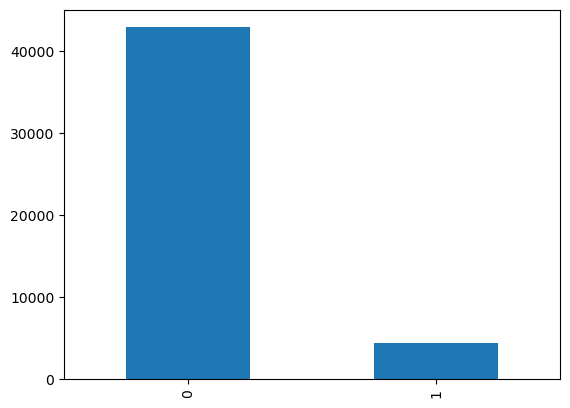

In [22]:
# target distribution
counts = train['Loan Status'].value_counts()      # So target variable is NOT evenly distributed
#print(counts)
counts.plot(kind = 'bar')

### One way to solve the data imbalace problem is data generation using SMOTE

In [25]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority',random_state = 0)

X_sm,y_sm = smote.fit_resample(X_train_transformed,y_train)

In [27]:
rcf.fit(X_sm,y_sm)
preds = rcf.predict(X_test_transformed)
accuracy = float(np.sum(preds==y_test))/y_test.shape[0]
print("accuracy: %f" % (accuracy))

accuracy: 0.901475


In [29]:
print("f1 score on test set: {:.3f}".format(f1_score(y_test,preds)))

f1 score on test set: 0.007


In [26]:
xg_cl.fit(X_sm,y_sm)
preds = xg_cl.predict(X_test_transformed)
accuracy = float(np.sum(preds==y_test))/y_test.shape[0]
print("accuracy: %f" % (accuracy))

NameError: name 'xg_cl' is not defined

In [ ]:
confusion_matrix(y_test,preds)

In [ ]:
print(classification_report(y_test,preds))

In [ ]:
# Not much improvement

### Logistic Regression

In [30]:
ohe = OneHotEncoder(handle_unknown='ignore',sparse_output = False,drop='first')  # drop = fisrt to avoid collinearity

In [31]:
train_categorical_col = ohe.fit_transform(X_train[categorical_col])

train_numerical_col = scaler.fit_transform(X_train[numerical_col])

X_train_transformed = np.hstack((train_categorical_col,train_numerical_col))

In [32]:
from sklearn.linear_model import LogisticRegression

In [62]:
logreg = LogisticRegression(max_iter = 1000,C = 0.01)   # Taking Cost of missclassification a bit low to avoid overfitting 

In [63]:
logreg.fit(X_train_transformed,y_train)

LogisticRegression(C=0.01, max_iter=1000)

In [64]:
test_categorical_col = ohe.transform(X_test[categorical_col])

test_numerical_col = scaler.transform(X_test[numerical_col])

X_test_transformed = np.hstack((test_categorical_col,test_numerical_col))

In [65]:
preds = logreg.predict(X_test_transformed)
accuracy = float(np.sum(preds==y_test))/y_test.shape[0]
print("accuracy: %f" % (accuracy))

accuracy: 0.907396


In [66]:
print("f1 score on test set: {:.3f}".format(f1_score(y_test,preds)))

f1 score on test set: 0.000


**f1 score does not seems to imporove.**

In [ ]:
import xgboost as xgb
xg_cl = xgb.XGBClassifier(objective='binary:logistic',n_estimators=10, seed=123)
xg_cl.fit(X_train, y_train)
preds = xg_cl.predict(X_test)
accuracy = float(np.sum(preds==y_test))/y_test.shape[0]
print("accuracy: %f" % (accuracy))